<a href="https://colab.research.google.com/github/celiamarrakchi/ML_esprit/blob/main/patient_admission_clustering_AR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Préparation des Données

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

patients = pd.read_csv('/content/drive/MyDrive/mimic/patient.csv')
admissions = pd.read_csv('/content/drive/MyDrive/mimic/admission.csv')


In [ ]:
print(patients.head())
print(admissions.head())

   row_id  subject_id gender                  dob                  dod  \
0    9467       10006      F  2094-03-05 00:00:00  2165-08-12 00:00:00   
1    9472       10011      F  2090-06-05 00:00:00  2126-08-28 00:00:00   
2    9474       10013      F  2038-09-03 00:00:00  2125-10-07 00:00:00   
3    9478       10017      F  2075-09-21 00:00:00  2152-09-12 00:00:00   
4    9479       10019      M  2114-06-20 00:00:00  2163-05-15 00:00:00   

              dod_hosp              dod_ssn  expire_flag  
0  2165-08-12 00:00:00  2165-08-12 00:00:00            1  
1  2126-08-28 00:00:00                  NaN            1  
2  2125-10-07 00:00:00  2125-10-07 00:00:00            1  
3                  NaN  2152-09-12 00:00:00            1  
4  2163-05-15 00:00:00  2163-05-15 00:00:00            1  
   row_id  subject_id  hadm_id            admittime            dischtime  \
0   12258       10006   142345  2164-10-23 21:09:00  2164-11-01 17:15:00   
1   12263       10011   105331  2126-08-14 22:32:

In [ ]:
print(patients.info())
print(admissions.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   row_id       100 non-null    int64 
 1   subject_id   100 non-null    int64 
 2   gender       100 non-null    object
 3   dob          100 non-null    object
 4   dod          100 non-null    object
 5   dod_hosp     70 non-null     object
 6   dod_ssn      77 non-null     object
 7   expire_flag  100 non-null    int64 
dtypes: int64(3), object(5)
memory usage: 6.4+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129 entries, 0 to 128
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   row_id                129 non-null    int64 
 1   subject_id            129 non-null    int64 
 2   hadm_id               129 non-null    int64 
 3   admittime             129 non-null    object
 4   dischtime             

In [ ]:
patients.shape

(100, 8)

In [ ]:
patients.head()

,row_id,subject_id,gender,dob,dod,dod_hosp,dod_ssn,expire_flag
0,9467,10006,F,2094-03-05 00:00:00,2165-08-12 00:00:00,2165-08-12 00:00:00,2165-08-12 00:00:00,1
1,9472,10011,F,2090-06-05 00:00:00,2126-08-28 00:00:00,2126-08-28 00:00:00,NaN,1
2,9474,10013,F,2038-09-03 00:00:00,2125-10-07 00:00:00,2125-10-07 00:00:00,2125-10-07 00:00:00,1
3,9478,10017,F,2075-09-21 00:00:00,2152-09-12 00:00:00,NaN,2152-09-12 00:00:00,1
4,9479,10019,M,2114-06-20 00:00:00,2163-05-15 00:00:00,2163-05-15 00:00:00,2163-05-15 00:00:00,1


In [ ]:
admissions.shape

(129, 19)

In [ ]:
admissions.head()

,row_id,subject_id,hadm_id,admittime,dischtime,deathtime,admission_type,admission_location,discharge_location,insurance,language,religion,marital_status,ethnicity,edregtime,edouttime,diagnosis,hospital_expire_flag,has_chartevents_data
0,12258,10006,142345,2164-10-23 21:09:00,2164-11-01 17:15:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,HOME HEALTH CARE,Medicare,NaN,CATHOLIC,SEPARATED,BLACK/AFRICAN AMERICAN,2164-10-23 16:43:00,2164-10-23 23:00:00,SEPSIS,0,1
1,12263,10011,105331,2126-08-14 22:32:00,2126-08-28 18:59:00,2126-08-28 18:59:00,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,DEAD/EXPIRED,Private,NaN,CATHOLIC,SINGLE,UNKNOWN/NOT SPECIFIED,NaN,NaN,HEPATITIS B,1,1
2,12265,10013,165520,2125-10-04 23:36:00,2125-10-07 15:13:00,2125-10-07 15:13:00,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,DEAD/EXPIRED,Medicare,NaN,CATHOLIC,NaN,UNKNOWN/NOT SPECIFIED,NaN,NaN,SEPSIS,1,1
3,12269,10017,199207,2149-05-26 17:19:00,2149-06-03 18:42:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,SNF,Medicare,NaN,CATHOLIC,DIVORCED,WHITE,2149-05-26 12:08:00,2149-05-26 19:45:00,HUMERAL FRACTURE,0,1
4,12270,10019,177759,2163-05-14 20:43:00,2163-05-15 12:00:00,2163-05-15 12:00:00,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,DEAD/EXPIRED,Medicare,NaN,CATHOLIC,DIVORCED,WHITE,NaN,NaN,ALCOHOLIC HEPATITIS,1,1


In [ ]:
data = pd.merge(admissions, patients, on='subject_id', how='inner')

In [ ]:
data.shape

(129, 26)

 Data preparation

Data Cleaning:

In [ ]:
data2=data.drop_duplicates()

In [ ]:
data2.duplicated().sum()

0

In [ ]:
data.shape

(129, 26)

 Handling Missing Values:

In [ ]:
print(data.isnull().sum())


row_id_x                 0
subject_id               0
hadm_id                  0
admittime                0
dischtime                0
deathtime               89
admission_type           0
admission_location       0
discharge_location       0
insurance                0
language                48
religion                 1
marital_status          16
ethnicity                0
edregtime               37
edouttime               37
diagnosis                0
hospital_expire_flag     0
has_chartevents_data     0
row_id_y                 0
gender                   0
dob                      0
dod                      0
dod_hosp                48
dod_ssn                 25
expire_flag              0
dtype: int64


In [ ]:
#replace them by the most frequent value
data2['language'] = data2['language'].fillna(data2['language'].mode()[0])
data2['religion'] = data2['religion'].fillna(data2['religion'].mode()[0])
data2['marital_status'] = data2['marital_status'].fillna(data2['marital_status'].mode()[0])

In [ ]:
# Convertir en timestamp pour pouvoir appliquer la médiane
edregtime_median = pd.to_datetime(data2['edregtime']).astype(int).median()
edouttime_median = pd.to_datetime(data2['edouttime']).astype(int).median()

# Remplacer les valeurs manquantes par la date médiane
data2['edregtime'] = data2['edregtime'].fillna(pd.to_datetime(edregtime_median))
data2['edouttime'] = data2['edouttime'].fillna(pd.to_datetime(edouttime_median))

In [ ]:
data2['deathtime'].fillna('Alive', inplace=True)
data2['dod_hosp'].fillna('Alive', inplace=True)
data2['dod_ssn'].fillna('Alive', inplace=True)


<ipython-input-17-968a57e27792>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data2['deathtime'].fillna('Alive', inplace=True)
<ipython-input-17-968a57e27792>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usin

In [ ]:
#Check for missing values
data2.isnull().sum()

,0
row_id_x,0
subject_id,0
hadm_id,0
admittime,0
dischtime,0
deathtime,0
admission_type,0
admission_location,0
discharge_location,0
insurance,0


In [ ]:
data2.head()

,row_id_x,subject_id,hadm_id,admittime,dischtime,deathtime,admission_type,admission_location,discharge_location,insurance,...,diagnosis,hospital_expire_flag,has_chartevents_data,row_id_y,gender,dob,dod,dod_hosp,dod_ssn,expire_flag
0,12258,10006,142345,2164-10-23 21:09:00,2164-11-01 17:15:00,Alive,EMERGENCY,EMERGENCY ROOM ADMIT,HOME HEALTH CARE,Medicare,...,SEPSIS,0,1,9467,F,2094-03-05 00:00:00,2165-08-12 00:00:00,2165-08-12 00:00:00,2165-08-12 00:00:00,1
1,12263,10011,105331,2126-08-14 22:32:00,2126-08-28 18:59:00,2126-08-28 18:59:00,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,DEAD/EXPIRED,Private,...,HEPATITIS B,1,1,9472,F,2090-06-05 00:00:00,2126-08-28 00:00:00,2126-08-28 00:00:00,Alive,1
2,12265,10013,165520,2125-10-04 23:36:00,2125-10-07 15:13:00,2125-10-07 15:13:00,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,DEAD/EXPIRED,Medicare,...,SEPSIS,1,1,9474,F,2038-09-03 00:00:00,2125-10-07 00:00:00,2125-10-07 00:00:00,2125-10-07 00:00:00,1
3,12269,10017,199207,2149-05-26 17:19:00,2149-06-03 18:42:00,Alive,EMERGENCY,EMERGENCY ROOM ADMIT,SNF,Medicare,...,HUMERAL FRACTURE,0,1,9478,F,2075-09-21 00:00:00,2152-09-12 00:00:00,Alive,2152-09-12 00:00:00,1
4,12270,10019,177759,2163-05-14 20:43:00,2163-05-15 12:00:00,2163-05-15 12:00:00,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,DEAD/EXPIRED,Medicare,...,ALCOHOLIC HEPATITIS,1,1,9479,M,2114-06-20 00:00:00,2163-05-15 00:00:00,2163-05-15 00:00:00,2163-05-15 00:00:00,1


In [ ]:
# Assurez-vous que les colonnes sont au format datetime
data2['admittime'] = pd.to_datetime(data2['admittime'])
data2['dischtime'] = pd.to_datetime(data2['dischtime'])

In [ ]:
# Calculer la durée du séjour en heures
data2['length_of_stay'] = (data2['dischtime'] - data2['admittime']).dt.total_seconds() / 3600  # en heures

In [ ]:
# Supprimer les colonnes admittime et dischtime
data2.drop(columns=['admittime', 'dischtime'], inplace=True)

In [ ]:
# Supprimer les colonnes row id
data2.drop(columns=['row_id_y', 'row_id_x'], inplace=True)

In [ ]:
data2.head()

,subject_id,hadm_id,deathtime,admission_type,admission_location,discharge_location,insurance,language,religion,marital_status,...,diagnosis,hospital_expire_flag,has_chartevents_data,gender,dob,dod,dod_hosp,dod_ssn,expire_flag,length_of_stay
0,10006,142345,Alive,EMERGENCY,EMERGENCY ROOM ADMIT,HOME HEALTH CARE,Medicare,ENGL,CATHOLIC,SEPARATED,...,SEPSIS,0,1,F,2094-03-05 00:00:00,2165-08-12 00:00:00,2165-08-12 00:00:00,2165-08-12 00:00:00,1,212.100000
1,10011,105331,2126-08-28 18:59:00,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,DEAD/EXPIRED,Private,ENGL,CATHOLIC,SINGLE,...,HEPATITIS B,1,1,F,2090-06-05 00:00:00,2126-08-28 00:00:00,2126-08-28 00:00:00,Alive,1,332.450000
2,10013,165520,2125-10-07 15:13:00,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,DEAD/EXPIRED,Medicare,ENGL,CATHOLIC,MARRIED,...,SEPSIS,1,1,F,2038-09-03 00:00:00,2125-10-07 00:00:00,2125-10-07 00:00:00,2125-10-07 00:00:00,1,63.616667
3,10017,199207,Alive,EMERGENCY,EMERGENCY ROOM ADMIT,SNF,Medicare,ENGL,CATHOLIC,DIVORCED,...,HUMERAL FRACTURE,0,1,F,2075-09-21 00:00:00,2152-09-12 00:00:00,Alive,2152-09-12 00:00:00,1,193.383333
4,10019,177759,2163-05-15 12:00:00,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,DEAD/EXPIRED,Medicare,ENGL,CATHOLIC,DIVORCED,...,ALCOHOLIC HEPATITIS,1,1,M,2114-06-20 00:00:00,2163-05-15 00:00:00,2163-05-15 00:00:00,2163-05-15 00:00:00,1,15.283333


In [ ]:
# Convertir les colonnes de dates en datetime
data2['dob'] = pd.to_datetime(data2['dob'], errors='coerce')  # Coerce remplace les erreurs par NaT
data2['dod'] = pd.to_datetime(data2['dod'], errors='coerce')  # Coerce remplace les erreurs par NaT

In [ ]:
data2[['dob', 'dod']].head(129)

,dob,dod
0,2094-03-05,2165-08-12
1,2090-06-05,2126-08-28
2,2038-09-03,2125-10-07
3,2075-09-21,2152-09-12
4,2114-06-20,2163-05-15
...,...,...
124,2057-11-15,2114-02-20
125,1878-05-14,2178-05-15
126,2078-06-16,2124-01-29
127,2107-06-27,2182-08-03


In [ ]:
import numpy as np

# Calculer la différence en jours en utilisant numpy's timedelta64
data2['age_at_death'] = (data2['dod'].values.astype('datetime64[D]') -
                          data2['dob'].values.astype('datetime64[D]'))

# Convertir la différence en jours en années en divisant par 365.25 (pour tenir compte des années bissextiles)
data2['age_at_death'] = (data2['age_at_death'] / np.timedelta64(1, 'D')).astype(int) / 365.25
data2['age_at_death'] = data2['age_at_death'].astype(int) # Convertir en entier

In [ ]:
data2.head()

,subject_id,hadm_id,deathtime,admission_type,admission_location,discharge_location,insurance,language,religion,marital_status,...,hospital_expire_flag,has_chartevents_data,gender,dob,dod,dod_hosp,dod_ssn,expire_flag,length_of_stay,age_at_death
0,10006,142345,Alive,EMERGENCY,EMERGENCY ROOM ADMIT,HOME HEALTH CARE,Medicare,ENGL,CATHOLIC,SEPARATED,...,0,1,F,2094-03-05,2165-08-12,2165-08-12 00:00:00,2165-08-12 00:00:00,1,212.100000,71
1,10011,105331,2126-08-28 18:59:00,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,DEAD/EXPIRED,Private,ENGL,CATHOLIC,SINGLE,...,1,1,F,2090-06-05,2126-08-28,2126-08-28 00:00:00,Alive,1,332.450000,36
2,10013,165520,2125-10-07 15:13:00,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,DEAD/EXPIRED,Medicare,ENGL,CATHOLIC,MARRIED,...,1,1,F,2038-09-03,2125-10-07,2125-10-07 00:00:00,2125-10-07 00:00:00,1,63.616667,87
3,10017,199207,Alive,EMERGENCY,EMERGENCY ROOM ADMIT,SNF,Medicare,ENGL,CATHOLIC,DIVORCED,...,0,1,F,2075-09-21,2152-09-12,Alive,2152-09-12 00:00:00,1,193.383333,76
4,10019,177759,2163-05-15 12:00:00,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,DEAD/EXPIRED,Medicare,ENGL,CATHOLIC,DIVORCED,...,1,1,M,2114-06-20,2163-05-15,2163-05-15 00:00:00,2163-05-15 00:00:00,1,15.283333,48


In [ ]:
columns_to_drop = ['dob', 'dod', 'dod_hosp', 'dod_ssn']
data2 = data2.drop(columns=columns_to_drop)

In [ ]:
data2.head()

,subject_id,hadm_id,deathtime,admission_type,admission_location,discharge_location,insurance,language,religion,marital_status,ethnicity,edregtime,edouttime,diagnosis,hospital_expire_flag,has_chartevents_data,gender,expire_flag,length_of_stay,age_at_death
0,10006,142345,Alive,EMERGENCY,EMERGENCY ROOM ADMIT,HOME HEALTH CARE,Medicare,ENGL,CATHOLIC,SEPARATED,BLACK/AFRICAN AMERICAN,2164-10-23 16:43:00,2164-10-23 23:00:00,SEPSIS,0,1,F,1,212.100000,71
1,10011,105331,2126-08-28 18:59:00,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,DEAD/EXPIRED,Private,ENGL,CATHOLIC,SINGLE,UNKNOWN/NOT SPECIFIED,2138-04-02 14:56:00,2138-04-02 20:40:00,HEPATITIS B,1,1,F,1,332.450000,36
2,10013,165520,2125-10-07 15:13:00,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,DEAD/EXPIRED,Medicare,ENGL,CATHOLIC,MARRIED,UNKNOWN/NOT SPECIFIED,2138-04-02 14:56:00,2138-04-02 20:40:00,SEPSIS,1,1,F,1,63.616667,87
3,10017,199207,Alive,EMERGENCY,EMERGENCY ROOM ADMIT,SNF,Medicare,ENGL,CATHOLIC,DIVORCED,WHITE,2149-05-26 12:08:00,2149-05-26 19:45:00,HUMERAL FRACTURE,0,1,F,1,193.383333,76
4,10019,177759,2163-05-15 12:00:00,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,DEAD/EXPIRED,Medicare,ENGL,CATHOLIC,DIVORCED,WHITE,2138-04-02 14:56:00,2138-04-02 20:40:00,ALCOHOLIC HEPATITIS,1,1,M,1,15.283333,48


In [ ]:
# Assurez-vous que les colonnes sont en format datetime
data2['edregtime'] = pd.to_datetime(data2['edregtime'])
data2['edouttime'] = pd.to_datetime(data2['edouttime'])

# Calculer la durée du séjour en minutes
data2['duration_ed'] = (data2['edouttime'] - data2['edregtime']).dt.total_seconds() / 3600    # en heures


In [ ]:
data2.head()

,subject_id,hadm_id,deathtime,admission_type,admission_location,discharge_location,insurance,language,religion,marital_status,...,edregtime,edouttime,diagnosis,hospital_expire_flag,has_chartevents_data,gender,expire_flag,length_of_stay,age_at_death,duration_ed
0,10006,142345,Alive,EMERGENCY,EMERGENCY ROOM ADMIT,HOME HEALTH CARE,Medicare,ENGL,CATHOLIC,SEPARATED,...,2164-10-23 16:43:00,2164-10-23 23:00:00,SEPSIS,0,1,F,1,212.100000,71,6.283333
1,10011,105331,2126-08-28 18:59:00,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,DEAD/EXPIRED,Private,ENGL,CATHOLIC,SINGLE,...,2138-04-02 14:56:00,2138-04-02 20:40:00,HEPATITIS B,1,1,F,1,332.450000,36,5.733333
2,10013,165520,2125-10-07 15:13:00,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,DEAD/EXPIRED,Medicare,ENGL,CATHOLIC,MARRIED,...,2138-04-02 14:56:00,2138-04-02 20:40:00,SEPSIS,1,1,F,1,63.616667,87,5.733333
3,10017,199207,Alive,EMERGENCY,EMERGENCY ROOM ADMIT,SNF,Medicare,ENGL,CATHOLIC,DIVORCED,...,2149-05-26 12:08:00,2149-05-26 19:45:00,HUMERAL FRACTURE,0,1,F,1,193.383333,76,7.616667
4,10019,177759,2163-05-15 12:00:00,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,DEAD/EXPIRED,Medicare,ENGL,CATHOLIC,DIVORCED,...,2138-04-02 14:56:00,2138-04-02 20:40:00,ALCOHOLIC HEPATITIS,1,1,M,1,15.283333,48,5.733333


In [ ]:
data2 = data2.drop(columns=['deathtime', 'edregtime', 'edouttime'])

In [ ]:
data2.head()

,subject_id,hadm_id,admission_type,admission_location,discharge_location,insurance,language,religion,marital_status,ethnicity,diagnosis,hospital_expire_flag,has_chartevents_data,gender,expire_flag,length_of_stay,age_at_death,duration_ed
0,10006,142345,EMERGENCY,EMERGENCY ROOM ADMIT,HOME HEALTH CARE,Medicare,ENGL,CATHOLIC,SEPARATED,BLACK/AFRICAN AMERICAN,SEPSIS,0,1,F,1,212.100000,71,6.283333
1,10011,105331,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,DEAD/EXPIRED,Private,ENGL,CATHOLIC,SINGLE,UNKNOWN/NOT SPECIFIED,HEPATITIS B,1,1,F,1,332.450000,36,5.733333
2,10013,165520,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,DEAD/EXPIRED,Medicare,ENGL,CATHOLIC,MARRIED,UNKNOWN/NOT SPECIFIED,SEPSIS,1,1,F,1,63.616667,87,5.733333
3,10017,199207,EMERGENCY,EMERGENCY ROOM ADMIT,SNF,Medicare,ENGL,CATHOLIC,DIVORCED,WHITE,HUMERAL FRACTURE,0,1,F,1,193.383333,76,7.616667
4,10019,177759,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,DEAD/EXPIRED,Medicare,ENGL,CATHOLIC,DIVORCED,WHITE,ALCOHOLIC HEPATITIS,1,1,M,1,15.283333,48,5.733333


In [ ]:
data2.shape

(129, 18)

In [ ]:
data_for_association_rule=data2.copy()
data_for_association_rule.head()

,subject_id,hadm_id,admission_type,admission_location,discharge_location,insurance,language,religion,marital_status,ethnicity,diagnosis,hospital_expire_flag,has_chartevents_data,gender,expire_flag,length_of_stay,age_at_death,duration_ed
0,10006,142345,EMERGENCY,EMERGENCY ROOM ADMIT,HOME HEALTH CARE,Medicare,ENGL,CATHOLIC,SEPARATED,BLACK/AFRICAN AMERICAN,SEPSIS,0,1,F,1,212.100000,71,6.283333
1,10011,105331,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,DEAD/EXPIRED,Private,ENGL,CATHOLIC,SINGLE,UNKNOWN/NOT SPECIFIED,HEPATITIS B,1,1,F,1,332.450000,36,5.733333
2,10013,165520,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,DEAD/EXPIRED,Medicare,ENGL,CATHOLIC,MARRIED,UNKNOWN/NOT SPECIFIED,SEPSIS,1,1,F,1,63.616667,87,5.733333
3,10017,199207,EMERGENCY,EMERGENCY ROOM ADMIT,SNF,Medicare,ENGL,CATHOLIC,DIVORCED,WHITE,HUMERAL FRACTURE,0,1,F,1,193.383333,76,7.616667
4,10019,177759,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,DEAD/EXPIRED,Medicare,ENGL,CATHOLIC,DIVORCED,WHITE,ALCOHOLIC HEPATITIS,1,1,M,1,15.283333,48,5.733333


3.2. DATA TRANSFORMATION:

Data Encoding
Data Scaling

In [ ]:
from sklearn.preprocessing import LabelEncoder
# Initialize LabelEncoder
le = LabelEncoder()

# Fit and transform the "sex" column
data2['gender'] = le.fit_transform(data2['gender'])

In [ ]:
data2.head()

,subject_id,hadm_id,admission_type,admission_location,discharge_location,insurance,language,religion,marital_status,ethnicity,diagnosis,hospital_expire_flag,has_chartevents_data,gender,expire_flag,length_of_stay,age_at_death,duration_ed
0,10006,142345,EMERGENCY,EMERGENCY ROOM ADMIT,HOME HEALTH CARE,Medicare,ENGL,CATHOLIC,SEPARATED,BLACK/AFRICAN AMERICAN,SEPSIS,0,1,0,1,212.100000,71,6.283333
1,10011,105331,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,DEAD/EXPIRED,Private,ENGL,CATHOLIC,SINGLE,UNKNOWN/NOT SPECIFIED,HEPATITIS B,1,1,0,1,332.450000,36,5.733333
2,10013,165520,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,DEAD/EXPIRED,Medicare,ENGL,CATHOLIC,MARRIED,UNKNOWN/NOT SPECIFIED,SEPSIS,1,1,0,1,63.616667,87,5.733333
3,10017,199207,EMERGENCY,EMERGENCY ROOM ADMIT,SNF,Medicare,ENGL,CATHOLIC,DIVORCED,WHITE,HUMERAL FRACTURE,0,1,0,1,193.383333,76,7.616667
4,10019,177759,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,DEAD/EXPIRED,Medicare,ENGL,CATHOLIC,DIVORCED,WHITE,ALCOHOLIC HEPATITIS,1,1,1,1,15.283333,48,5.733333


In [ ]:
data2['admission_type'].unique()

array(['EMERGENCY', 'ELECTIVE', 'URGENT'], dtype=object)

In [ ]:
admission_mapping = {
    'EMERGENCY': 0,
    'ELECTIVE': 1,
    'URGENT': 2
}
#  Appliquer le mapping
data2['admission_type_encoded'] = data2['admission_type'].map(admission_mapping)

In [ ]:
data2.head()

,subject_id,hadm_id,admission_type,admission_location,discharge_location,insurance,language,religion,marital_status,ethnicity,diagnosis,hospital_expire_flag,has_chartevents_data,gender,expire_flag,length_of_stay,age_at_death,duration_ed,admission_type_encoded
0,10006,142345,EMERGENCY,EMERGENCY ROOM ADMIT,HOME HEALTH CARE,Medicare,ENGL,CATHOLIC,SEPARATED,BLACK/AFRICAN AMERICAN,SEPSIS,0,1,0,1,212.100000,71,6.283333,0
1,10011,105331,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,DEAD/EXPIRED,Private,ENGL,CATHOLIC,SINGLE,UNKNOWN/NOT SPECIFIED,HEPATITIS B,1,1,0,1,332.450000,36,5.733333,0
2,10013,165520,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,DEAD/EXPIRED,Medicare,ENGL,CATHOLIC,MARRIED,UNKNOWN/NOT SPECIFIED,SEPSIS,1,1,0,1,63.616667,87,5.733333,0
3,10017,199207,EMERGENCY,EMERGENCY ROOM ADMIT,SNF,Medicare,ENGL,CATHOLIC,DIVORCED,WHITE,HUMERAL FRACTURE,0,1,0,1,193.383333,76,7.616667,0
4,10019,177759,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,DEAD/EXPIRED,Medicare,ENGL,CATHOLIC,DIVORCED,WHITE,ALCOHOLIC HEPATITIS,1,1,1,1,15.283333,48,5.733333,0


In [ ]:
data2 = data2.drop(columns=['admission_type'])


In [ ]:
data2.head()

,subject_id,hadm_id,admission_location,discharge_location,insurance,language,religion,marital_status,ethnicity,diagnosis,hospital_expire_flag,has_chartevents_data,gender,expire_flag,length_of_stay,age_at_death,duration_ed,admission_type_encoded
0,10006,142345,EMERGENCY ROOM ADMIT,HOME HEALTH CARE,Medicare,ENGL,CATHOLIC,SEPARATED,BLACK/AFRICAN AMERICAN,SEPSIS,0,1,0,1,212.100000,71,6.283333,0
1,10011,105331,TRANSFER FROM HOSP/EXTRAM,DEAD/EXPIRED,Private,ENGL,CATHOLIC,SINGLE,UNKNOWN/NOT SPECIFIED,HEPATITIS B,1,1,0,1,332.450000,36,5.733333,0
2,10013,165520,TRANSFER FROM HOSP/EXTRAM,DEAD/EXPIRED,Medicare,ENGL,CATHOLIC,MARRIED,UNKNOWN/NOT SPECIFIED,SEPSIS,1,1,0,1,63.616667,87,5.733333,0
3,10017,199207,EMERGENCY ROOM ADMIT,SNF,Medicare,ENGL,CATHOLIC,DIVORCED,WHITE,HUMERAL FRACTURE,0,1,0,1,193.383333,76,7.616667,0
4,10019,177759,TRANSFER FROM HOSP/EXTRAM,DEAD/EXPIRED,Medicare,ENGL,CATHOLIC,DIVORCED,WHITE,ALCOHOLIC HEPATITIS,1,1,1,1,15.283333,48,5.733333,0


In [ ]:
data2['marital_status'].unique()

array(['SEPARATED', 'SINGLE', 'MARRIED', 'DIVORCED', 'WIDOWED',
       'UNKNOWN (DEFAULT)'], dtype=object)

In [ ]:
#DIVORCED → 0,MARRIED → 1,SEPARATED → 2,SINGLE → 3,UNKNOWN (DEFAULT) → 4,WIDOWED → 5
label_encoder = LabelEncoder()
data2['marital_status'] = label_encoder.fit_transform(data2['marital_status'])

In [ ]:
data2.head()

,subject_id,hadm_id,admission_location,discharge_location,insurance,language,religion,marital_status,ethnicity,diagnosis,hospital_expire_flag,has_chartevents_data,gender,expire_flag,length_of_stay,age_at_death,duration_ed,admission_type_encoded
0,10006,142345,EMERGENCY ROOM ADMIT,HOME HEALTH CARE,Medicare,ENGL,CATHOLIC,2,BLACK/AFRICAN AMERICAN,SEPSIS,0,1,0,1,212.100000,71,6.283333,0
1,10011,105331,TRANSFER FROM HOSP/EXTRAM,DEAD/EXPIRED,Private,ENGL,CATHOLIC,3,UNKNOWN/NOT SPECIFIED,HEPATITIS B,1,1,0,1,332.450000,36,5.733333,0
2,10013,165520,TRANSFER FROM HOSP/EXTRAM,DEAD/EXPIRED,Medicare,ENGL,CATHOLIC,1,UNKNOWN/NOT SPECIFIED,SEPSIS,1,1,0,1,63.616667,87,5.733333,0
3,10017,199207,EMERGENCY ROOM ADMIT,SNF,Medicare,ENGL,CATHOLIC,0,WHITE,HUMERAL FRACTURE,0,1,0,1,193.383333,76,7.616667,0
4,10019,177759,TRANSFER FROM HOSP/EXTRAM,DEAD/EXPIRED,Medicare,ENGL,CATHOLIC,0,WHITE,ALCOHOLIC HEPATITIS,1,1,1,1,15.283333,48,5.733333,0


In [ ]:
data2['language'].unique()

array(['ENGL', 'POLI', 'MAND', 'RUSS', 'SPAN'], dtype=object)

In [ ]:
#ENGL → 0,MAND → 1,POLI → 2,RUSS → 3,SPA → 4
label_encoder = LabelEncoder()
# Encodage de la colonne 'language'
data2['language_encoded'] = label_encoder.fit_transform(data2['language'])

data2 = data2.drop(columns=['language'])

In [ ]:
data2.head()

,subject_id,hadm_id,admission_location,discharge_location,insurance,religion,marital_status,ethnicity,diagnosis,hospital_expire_flag,has_chartevents_data,gender,expire_flag,length_of_stay,age_at_death,duration_ed,admission_type_encoded,language_encoded
0,10006,142345,EMERGENCY ROOM ADMIT,HOME HEALTH CARE,Medicare,CATHOLIC,2,BLACK/AFRICAN AMERICAN,SEPSIS,0,1,0,1,212.100000,71,6.283333,0,0
1,10011,105331,TRANSFER FROM HOSP/EXTRAM,DEAD/EXPIRED,Private,CATHOLIC,3,UNKNOWN/NOT SPECIFIED,HEPATITIS B,1,1,0,1,332.450000,36,5.733333,0,0
2,10013,165520,TRANSFER FROM HOSP/EXTRAM,DEAD/EXPIRED,Medicare,CATHOLIC,1,UNKNOWN/NOT SPECIFIED,SEPSIS,1,1,0,1,63.616667,87,5.733333,0,0
3,10017,199207,EMERGENCY ROOM ADMIT,SNF,Medicare,CATHOLIC,0,WHITE,HUMERAL FRACTURE,0,1,0,1,193.383333,76,7.616667,0,0
4,10019,177759,TRANSFER FROM HOSP/EXTRAM,DEAD/EXPIRED,Medicare,CATHOLIC,0,WHITE,ALCOHOLIC HEPATITIS,1,1,1,1,15.283333,48,5.733333,0,0


In [ ]:
data2['insurance'].unique()

array(['Medicare', 'Private', 'Medicaid', 'Government'], dtype=object)

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

# Définir l'ordre des catégories manuellement
order = ['Private', 'Medicare', 'Medicaid', 'Government']

# Création de l'encodeur avec l'ordre explicite
ordinal_encoder = OrdinalEncoder(categories=[order])

# Encodage de la colonne 'insurance'
data2['insurance'] = ordinal_encoder.fit_transform(data2[['insurance']])


In [ ]:
data2.head()

,subject_id,hadm_id,admission_location,discharge_location,insurance,religion,marital_status,ethnicity,diagnosis,hospital_expire_flag,has_chartevents_data,gender,expire_flag,length_of_stay,age_at_death,duration_ed,admission_type_encoded,language_encoded
0,10006,142345,EMERGENCY ROOM ADMIT,HOME HEALTH CARE,1.0,CATHOLIC,2,BLACK/AFRICAN AMERICAN,SEPSIS,0,1,0,1,212.100000,71,6.283333,0,0
1,10011,105331,TRANSFER FROM HOSP/EXTRAM,DEAD/EXPIRED,0.0,CATHOLIC,3,UNKNOWN/NOT SPECIFIED,HEPATITIS B,1,1,0,1,332.450000,36,5.733333,0,0
2,10013,165520,TRANSFER FROM HOSP/EXTRAM,DEAD/EXPIRED,1.0,CATHOLIC,1,UNKNOWN/NOT SPECIFIED,SEPSIS,1,1,0,1,63.616667,87,5.733333,0,0
3,10017,199207,EMERGENCY ROOM ADMIT,SNF,1.0,CATHOLIC,0,WHITE,HUMERAL FRACTURE,0,1,0,1,193.383333,76,7.616667,0,0
4,10019,177759,TRANSFER FROM HOSP/EXTRAM,DEAD/EXPIRED,1.0,CATHOLIC,0,WHITE,ALCOHOLIC HEPATITIS,1,1,1,1,15.283333,48,5.733333,0,0


In [ ]:
data2['admission_location'].unique()

array(['EMERGENCY ROOM ADMIT', 'TRANSFER FROM HOSP/EXTRAM',
       'PHYS REFERRAL/NORMAL DELI', 'CLINIC REFERRAL/PREMATURE',
       'TRANSFER FROM SKILLED NUR'], dtype=object)

In [ ]:
#'CLINIC REFERRAL/PREMATURE' → 0,'EMERGENCY ROOM ADMIT' → 1,'PHYS REFERRAL/NORMAL DELI' → 2,'TRANSFER FROM HOSP/EXTRAM' → 3,'TRANSFER FROM SKILLED NUR' → 4
label_encoder = LabelEncoder()
data2['admission_location'] = label_encoder.fit_transform(data2['admission_location'])

In [ ]:
data2.head()

,subject_id,hadm_id,admission_location,discharge_location,insurance,religion,marital_status,ethnicity,diagnosis,hospital_expire_flag,has_chartevents_data,gender,expire_flag,length_of_stay,age_at_death,duration_ed,admission_type_encoded,language_encoded
0,10006,142345,1,HOME HEALTH CARE,1.0,CATHOLIC,2,BLACK/AFRICAN AMERICAN,SEPSIS,0,1,0,1,212.100000,71,6.283333,0,0
1,10011,105331,3,DEAD/EXPIRED,0.0,CATHOLIC,3,UNKNOWN/NOT SPECIFIED,HEPATITIS B,1,1,0,1,332.450000,36,5.733333,0,0
2,10013,165520,3,DEAD/EXPIRED,1.0,CATHOLIC,1,UNKNOWN/NOT SPECIFIED,SEPSIS,1,1,0,1,63.616667,87,5.733333,0,0
3,10017,199207,1,SNF,1.0,CATHOLIC,0,WHITE,HUMERAL FRACTURE,0,1,0,1,193.383333,76,7.616667,0,0
4,10019,177759,3,DEAD/EXPIRED,1.0,CATHOLIC,0,WHITE,ALCOHOLIC HEPATITIS,1,1,1,1,15.283333,48,5.733333,0,0


In [ ]:
data2['discharge_location'].unique()

array(['HOME HEALTH CARE', 'DEAD/EXPIRED', 'SNF',
       'REHAB/DISTINCT PART HOSP', 'HOME', 'HOSPICE-HOME',
       'DISCH-TRAN TO PSYCH HOSP', 'HOME WITH HOME IV PROVIDR',
       'LONG TERM CARE HOSPITAL', 'ICF'], dtype=object)

In [ ]:
#'DEAD/EXPIRED' → 0,'DISCH-TRAN TO PSYCH HOSP' → 1,'HOME' → 2,'HOME HEALTH CARE' → 3,'HOME WITH HOME IV PROVIDR' → 4,'HOSPICE-HOME' → 5,'ICF' → 6,'LONG TERM CARE HOSPITAL' → 7,'REHAB/DISTINCT PART HOSP' → 8,'SNF' → 9
label_encoder = LabelEncoder()
# Appliquer l'encodage
data2['discharge_location'] = label_encoder.fit_transform(data2['discharge_location'])


In [ ]:
data2.head()

,subject_id,hadm_id,admission_location,discharge_location,insurance,religion,marital_status,ethnicity,diagnosis,hospital_expire_flag,has_chartevents_data,gender,expire_flag,length_of_stay,age_at_death,duration_ed,admission_type_encoded,language_encoded
0,10006,142345,1,3,1.0,CATHOLIC,2,BLACK/AFRICAN AMERICAN,SEPSIS,0,1,0,1,212.100000,71,6.283333,0,0
1,10011,105331,3,0,0.0,CATHOLIC,3,UNKNOWN/NOT SPECIFIED,HEPATITIS B,1,1,0,1,332.450000,36,5.733333,0,0
2,10013,165520,3,0,1.0,CATHOLIC,1,UNKNOWN/NOT SPECIFIED,SEPSIS,1,1,0,1,63.616667,87,5.733333,0,0
3,10017,199207,1,9,1.0,CATHOLIC,0,WHITE,HUMERAL FRACTURE,0,1,0,1,193.383333,76,7.616667,0,0
4,10019,177759,3,0,1.0,CATHOLIC,0,WHITE,ALCOHOLIC HEPATITIS,1,1,1,1,15.283333,48,5.733333,0,0


In [ ]:
data2['religion'].unique()

array(['CATHOLIC', 'OTHER', 'PROTESTANT QUAKER', 'NOT SPECIFIED',
       'JEWISH', 'UNOBTAINABLE', 'CHRISTIAN SCIENTIST', 'BUDDHIST',
       'ROMANIAN EAST. ORTH', 'MUSLIM'], dtype=object)

In [ ]:
# 'BUDDHIST' → 0, 'CATHOLIC' → 1, 'CHRISTIAN SCIENTIST' → 2, 'JEWISH' → 3, 'MUSLIM' → 4, 'NOT SPECIFIED' → 5, 'OTHER' → 6, 'PROTESTANT QUAKER' → 7, 'ROMANIAN EAST. ORTH' → 8, 'UNOBTAINABLE' → 9
# Initialisation du LabelEncoder
label_encoder = LabelEncoder()

# Appliquer l'encodage
data2['religion'] = label_encoder.fit_transform(data2['religion'])

In [ ]:
data2.head()

,subject_id,hadm_id,admission_location,discharge_location,insurance,religion,marital_status,ethnicity,diagnosis,hospital_expire_flag,has_chartevents_data,gender,expire_flag,length_of_stay,age_at_death,duration_ed,admission_type_encoded,language_encoded
0,10006,142345,1,3,1.0,1,2,BLACK/AFRICAN AMERICAN,SEPSIS,0,1,0,1,212.100000,71,6.283333,0,0
1,10011,105331,3,0,0.0,1,3,UNKNOWN/NOT SPECIFIED,HEPATITIS B,1,1,0,1,332.450000,36,5.733333,0,0
2,10013,165520,3,0,1.0,1,1,UNKNOWN/NOT SPECIFIED,SEPSIS,1,1,0,1,63.616667,87,5.733333,0,0
3,10017,199207,1,9,1.0,1,0,WHITE,HUMERAL FRACTURE,0,1,0,1,193.383333,76,7.616667,0,0
4,10019,177759,3,0,1.0,1,0,WHITE,ALCOHOLIC HEPATITIS,1,1,1,1,15.283333,48,5.733333,0,0


In [ ]:
data2['ethnicity'].unique()

array(['BLACK/AFRICAN AMERICAN', 'UNKNOWN/NOT SPECIFIED', 'WHITE',
       'OTHER', 'ASIAN', 'HISPANIC OR LATINO',
       'HISPANIC/LATINO - PUERTO RICAN', 'UNABLE TO OBTAIN',
       'AMERICAN INDIAN/ALASKA NATIVE FEDERALLY RECOGNIZED TRIBE'],
      dtype=object)

In [ ]:
# 'AMERICAN INDIAN/ALASKA NATIVE FEDERALLY RECOGNIZED TRIBE' → 0, 'ASIAN' → 1, 'BLACK/AFRICAN AMERICAN' → 2, 'HISPANIC/LATINO - PUERTO RICAN' → 3, 'HISPANIC OR LATINO' → 4, 'OTHER' → 5, 'UNKNOWN/NOT SPECIFIED' → 6, 'UNABLE TO OBTAIN' → 7, 'WHITE' → 8
# Initialisation du LabelEncoder
label_encoder = LabelEncoder()
# Appliquer l'encodage sur la colonne 'ethnicity'
data2['ethnicity'] = label_encoder.fit_transform(data2['ethnicity'])

In [ ]:
data2.head()

,subject_id,hadm_id,admission_location,discharge_location,insurance,religion,marital_status,ethnicity,diagnosis,hospital_expire_flag,has_chartevents_data,gender,expire_flag,length_of_stay,age_at_death,duration_ed,admission_type_encoded,language_encoded
0,10006,142345,1,3,1.0,1,2,2,SEPSIS,0,1,0,1,212.100000,71,6.283333,0,0
1,10011,105331,3,0,0.0,1,3,7,HEPATITIS B,1,1,0,1,332.450000,36,5.733333,0,0
2,10013,165520,3,0,1.0,1,1,7,SEPSIS,1,1,0,1,63.616667,87,5.733333,0,0
3,10017,199207,1,9,1.0,1,0,8,HUMERAL FRACTURE,0,1,0,1,193.383333,76,7.616667,0,0
4,10019,177759,3,0,1.0,1,0,8,ALCOHOLIC HEPATITIS,1,1,1,1,15.283333,48,5.733333,0,0


In [ ]:
data2['diagnosis'].unique()

array(['SEPSIS', 'HEPATITIS B', 'HUMERAL FRACTURE', 'ALCOHOLIC HEPATITIS',
       'STROKE/TIA',
       ' MITRAL REGURGITATION;CORONARY ARTERY DISEASE\\CORONARY ARTERY BYPASS GRAFT WITH MVR  ? MITRAL VALVE REPLACEMENT /SDA',
       'SYNCOPE;TELEMETRY', 'RIGHT HUMEROUS FRACTURE',
       'RENAL FAILIURE-SYNCOPE-HYPERKALEMIA',
       'RECURRENT LEFT CAROTID STENOSIS,PRE HYDRATION',
       'FAILURE TO THRIVE', 'PULMONARY EDEMA\\CATH', 'UNSTABLE ANGINA',
       'RESPIRATORY DISTRESS', 'METASTATIC MELANOMA;BRAIN METASTASIS',
       'FEVER', 'BRAIN METASTASES', 'VARICEAL BLEED', 'LOWER GI BLEED',
       'CHEST PAIN/ CATH', 'SUBDURAL HEMATOMA/S/P FALL',
       'ESOPHAGEAL CANCER/SDA', 'S/P MOTORCYCLE ACCIDENT', 'SEIZURE',
       'GASTROINTESTINAL BLEED', 'LUNG CANCER;SHORTNESS OF BREATH',
       'HYPOTENSION', 'SEPSIS;PNEUMONIA;TELEMETRY',
       'CONGESTIVE HEART FAILURE', 'UROSEPSIS', 'BASAL GANGLIN BLEED',
       'OVERDOSE', 'CRITICAL AORTIC STENOSIS/HYPOTENSION',
       'HYPOTENSION;TELEMET

In [ ]:
# Initialisation du LabelEncoder
label_encoder = LabelEncoder()

# Appliquer l'encodage sur la colonne 'diagnosis'
data2['diagnosis'] = label_encoder.fit_transform(data2['diagnosis'])

In [ ]:
data2.head()

,subject_id,hadm_id,admission_location,discharge_location,insurance,religion,marital_status,ethnicity,diagnosis,hospital_expire_flag,has_chartevents_data,gender,expire_flag,length_of_stay,age_at_death,duration_ed,admission_type_encoded,language_encoded
0,10006,142345,1,3,1.0,1,2,2,73,0,1,0,1,212.100000,71,6.283333,0,0
1,10011,105331,3,0,0.0,1,3,7,36,1,1,0,1,332.450000,36,5.733333,0,0
2,10013,165520,3,0,1.0,1,1,7,73,1,1,0,1,63.616667,87,5.733333,0,0
3,10017,199207,1,9,1.0,1,0,8,37,0,1,0,1,193.383333,76,7.616667,0,0
4,10019,177759,3,0,1.0,1,0,8,8,1,1,1,1,15.283333,48,5.733333,0,0


In [ ]:
data3 = data2.drop(columns=['subject_id','hadm_id'])

In [ ]:
data3.head()

,admission_location,discharge_location,insurance,religion,marital_status,ethnicity,diagnosis,hospital_expire_flag,has_chartevents_data,gender,expire_flag,length_of_stay,age_at_death,duration_ed,admission_type_encoded,language_encoded
0,1,3,1.0,1,2,2,73,0,1,0,1,212.100000,71,6.283333,0,0
1,3,0,0.0,1,3,7,36,1,1,0,1,332.450000,36,5.733333,0,0
2,3,0,1.0,1,1,7,73,1,1,0,1,63.616667,87,5.733333,0,0
3,1,9,1.0,1,0,8,37,0,1,0,1,193.383333,76,7.616667,0,0
4,3,0,1.0,1,0,8,8,1,1,1,1,15.283333,48,5.733333,0,0


3.2.2. Feature scaling

In [ ]:
y=data3['length_of_stay']
X=data3.drop('length_of_stay', axis=1)
Z=data3.copy()

travaillons sur z scaling et normalization

In [ ]:
Z.head()

,admission_location,discharge_location,insurance,religion,marital_status,ethnicity,diagnosis,hospital_expire_flag,has_chartevents_data,gender,expire_flag,length_of_stay,age_at_death,duration_ed,admission_type_encoded,language_encoded
0,1,3,1.0,1,2,2,73,0,1,0,1,212.100000,71,6.283333,0,0
1,3,0,0.0,1,3,7,36,1,1,0,1,332.450000,36,5.733333,0,0
2,3,0,1.0,1,1,7,73,1,1,0,1,63.616667,87,5.733333,0,0
3,1,9,1.0,1,0,8,37,0,1,0,1,193.383333,76,7.616667,0,0
4,3,0,1.0,1,0,8,8,1,1,1,1,15.283333,48,5.733333,0,0


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Initialize StandardScaler
scaler = StandardScaler()

# Fit and transform the entire dataset
scaled_data = scaler.fit_transform(X)
scaled_data2 = scaler.fit_transform(Z) #TOUTES LES DONNEES pour clustering

# Create a DataFrame with scaled data
scaled_df = pd.DataFrame(scaled_data, columns=X.columns)
scaled_df2 = pd.DataFrame(scaled_data2, columns=Z.columns)

# Display the scaled DataFrame
scaled_df
scaled_df2

,admission_location,discharge_location,insurance,religion,marital_status,ethnicity,diagnosis,hospital_expire_flag,has_chartevents_data,gender,expire_flag,length_of_stay,age_at_death,duration_ed,admission_type_encoded,language_encoded
0,-0.426513,-0.366156,0.248969,-0.879516,0.036791,-2.189857,0.910366,-0.670402,0.088388,-1.089239,0.0,-0.039052,-0.238138,0.198449,-0.273861,-0.453115
1,1.731142,-1.144742,-1.758342,-0.879516,0.714800,0.125648,-0.506848,1.491643,0.088388,-1.089239,0.0,0.356699,-0.813724,-0.019958,-0.273861,-0.453115
2,1.731142,-1.144742,0.248969,-0.879516,-0.641218,0.125648,0.910366,1.491643,0.088388,-1.089239,0.0,-0.527315,0.024987,-0.019958,-0.273861,-0.453115
3,-0.426513,1.191014,0.248969,-0.879516,-1.319227,0.588748,-0.468545,-0.670402,0.088388,-1.089239,0.0,-0.100599,-0.155912,0.727922,-0.273861,-0.453115
4,1.731142,-1.144742,0.248969,-0.879516,-1.319227,0.588748,-1.579334,1.491643,0.088388,0.918073,0.0,-0.686251,-0.616380,-0.019958,-0.273861,-0.453115
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124,-0.426513,-0.625685,-1.758342,-0.879516,0.714800,0.588748,0.259214,-0.670402,0.088388,0.918073,0.0,0.056255,-0.484818,-0.615614,-0.273861,-0.453115
125,-0.426513,-1.144742,0.248969,1.105165,-0.641218,0.588748,-1.541031,1.491643,0.088388,0.918073,0.0,-0.692883,3.511391,-0.503101,-0.273861,-0.453115
126,1.731142,0.931486,0.248969,1.766725,0.714800,-2.189857,-1.655940,-0.670402,0.088388,-1.089239,0.0,2.105546,-0.665716,-0.019958,-0.273861,-0.453115
127,-0.426513,-0.625685,0.248969,-0.879516,0.714800,0.588748,-1.349515,-0.670402,0.088388,0.918073,0.0,-0.637584,-0.172357,-0.886969,-0.273861,-0.453115


In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Initialize MinMaxScaler
scaler2 = MinMaxScaler()

# Fit and transform the entire dataset
scaled_data = scaler2.fit_transform(X)
scaled_data2 = scaler2.fit_transform(Z)
# Create a DataFrame with scaled data
scaled_df = pd.DataFrame(scaled_data, columns=X.columns)
scaled_df2 = pd.DataFrame(scaled_data2, columns=Z.columns)
# Display the scaled DataFrame
print(scaled_df)
print(scaled_df2)

     admission_location  discharge_location  insurance  religion  \
0                  0.25            0.333333   0.333333  0.111111   
1                  0.75            0.000000   0.000000  0.111111   
2                  0.75            0.000000   0.333333  0.111111   
3                  0.25            1.000000   0.333333  0.111111   
4                  0.75            0.000000   0.333333  0.111111   
..                  ...                 ...        ...       ...   
124                0.25            0.222222   0.000000  0.111111   
125                0.25            0.000000   0.333333  0.777778   
126                0.75            0.888889   0.333333  1.000000   
127                0.25            0.222222   0.333333  0.111111   
128                0.25            0.333333   0.000000  0.555556   

     marital_status  ethnicity  diagnosis  hospital_expire_flag  \
0               0.4      0.250   0.776596                   0.0   
1               0.6      0.875   0.382979        

3.3. Feature Selection

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

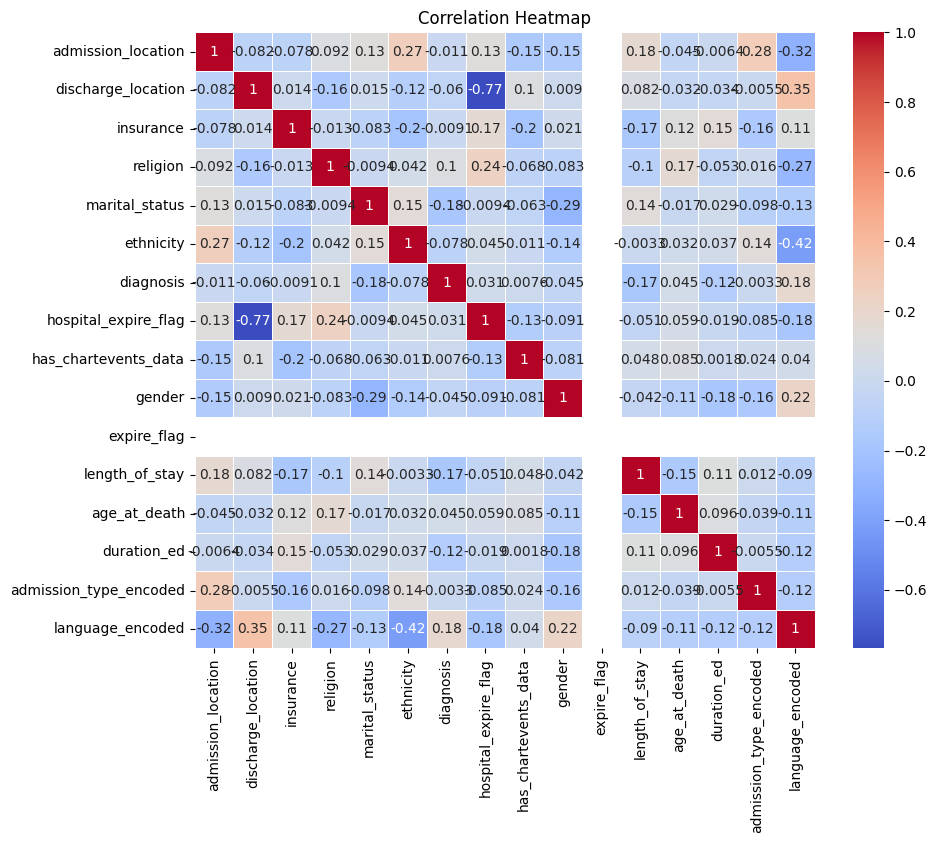

In [ ]:
# Calculate correlation coefficients
correlation = scaled_df2.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
# Extract and sort correlations by absolute value
correlations = scaled_df2.corr()["length_of_stay"].abs().sort_values(ascending = False)
print(correlations)

length_of_stay            1.000000
admission_location        0.175789
diagnosis                 0.170060
insurance                 0.167258
age_at_death              0.154105
marital_status            0.141384
duration_ed               0.111672
religion                  0.100281
language_encoded          0.090337
discharge_location        0.082115
hospital_expire_flag      0.051114
has_chartevents_data      0.047839
gender                    0.042121
admission_type_encoded    0.011521
ethnicity                 0.003306
expire_flag                    NaN
Name: length_of_stay, dtype: float64


In [ ]:
# Filter features based on correlation with the target
selected_features = correlation['length_of_stay'][abs(correlation['length_of_stay']) > 0.1].index.tolist()

# Print selected features
print("Selected Features:", selected_features)


Selected Features: ['admission_location', 'insurance', 'religion', 'marital_status', 'diagnosis', 'length_of_stay', 'age_at_death', 'duration_ed']


PCA (Principal component Anlysis)

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Extraire les caractéristiques (en excluant la cible)
features = ['admission_location', 'insurance', 'religion', 'marital_status', 'diagnosis', 'age_at_death', 'duration_ed']
X = scaled_df2[features]
y = scaled_df2['length_of_stay']

In [ ]:
# Appliquer la PCA
pca = PCA()  # On calcule toutes les composantes principales
X_pca = pca.fit_transform(X)

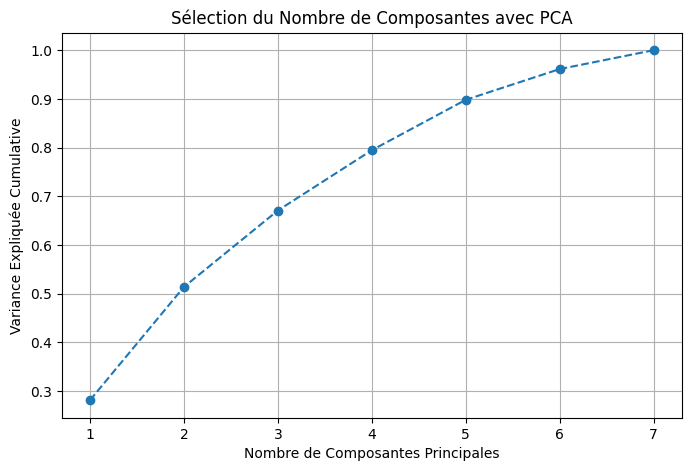

In [ ]:
# Afficher la variance expliquée cumulative
cumulative_variance = pca.explained_variance_ratio_.cumsum()
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.xlabel("Nombre de Composantes Principales")
plt.ylabel("Variance Expliquée Cumulative")
plt.title("Sélection du Nombre de Composantes avec PCA")
plt.grid()
plt.show()

In [ ]:
# Choisir le nombre de composantes pour capturer 95% de la variance
threshold = 0.95
n_components = next(i for i, cumulative_var in enumerate(cumulative_variance) if cumulative_var >= threshold) + 1
print(f"Nombre de composantes pour capturer 95% de la variance : {n_components}")


Nombre de composantes pour capturer 95% de la variance : 6


In [ ]:
# Réappliquer la PCA avec le nombre de composantes optimisé
pca = PCA(n_components=n_components)
X_pca_reduced = pca.fit_transform(X)

In [ ]:
pca_df = pd.DataFrame(X_pca_reduced, columns=[f"PC{i+1}" for i in range(n_components)])
print(pca_df.head())

        PC1       PC2       PC3       PC4       PC5       PC6
0 -0.223705 -0.209464  0.240921 -0.099207 -0.024052  0.054294
1 -0.344619  0.263927  0.165032  0.405297  0.016053 -0.211573
2 -0.146950 -0.266063  0.254416  0.355552  0.252378  0.048256
3 -0.270564 -0.348331 -0.270589  0.050489  0.030960  0.022072
4 -0.331823 -0.097736 -0.398468  0.551907  0.158951  0.036048


In [ ]:
print(pca_df.head(100))

         PC1       PC2       PC3       PC4       PC5       PC6
0  -0.223705 -0.209464  0.240921 -0.099207 -0.024052  0.054294
1  -0.344619  0.263927  0.165032  0.405297  0.016053 -0.211573
2  -0.146950 -0.266063  0.254416  0.355552  0.252378  0.048256
3  -0.270564 -0.348331 -0.270589  0.050489  0.030960  0.022072
4  -0.331823 -0.097736 -0.398468  0.551907  0.158951  0.036048
..       ...       ...       ...       ...       ...       ...
95 -0.043285 -0.141017 -0.364227 -0.201453 -0.196898  0.346881
96 -0.005616 -0.117337 -0.255759  0.008419 -0.105562  0.331188
97  0.261166  0.080399 -0.461282  0.016077 -0.107052  0.071490
98 -0.191465 -0.273215  0.119862  0.155478  0.146919  0.028529
99 -0.178529 -0.392736  0.180407 -0.053790  0.002511  0.032917

[100 rows x 6 columns]


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


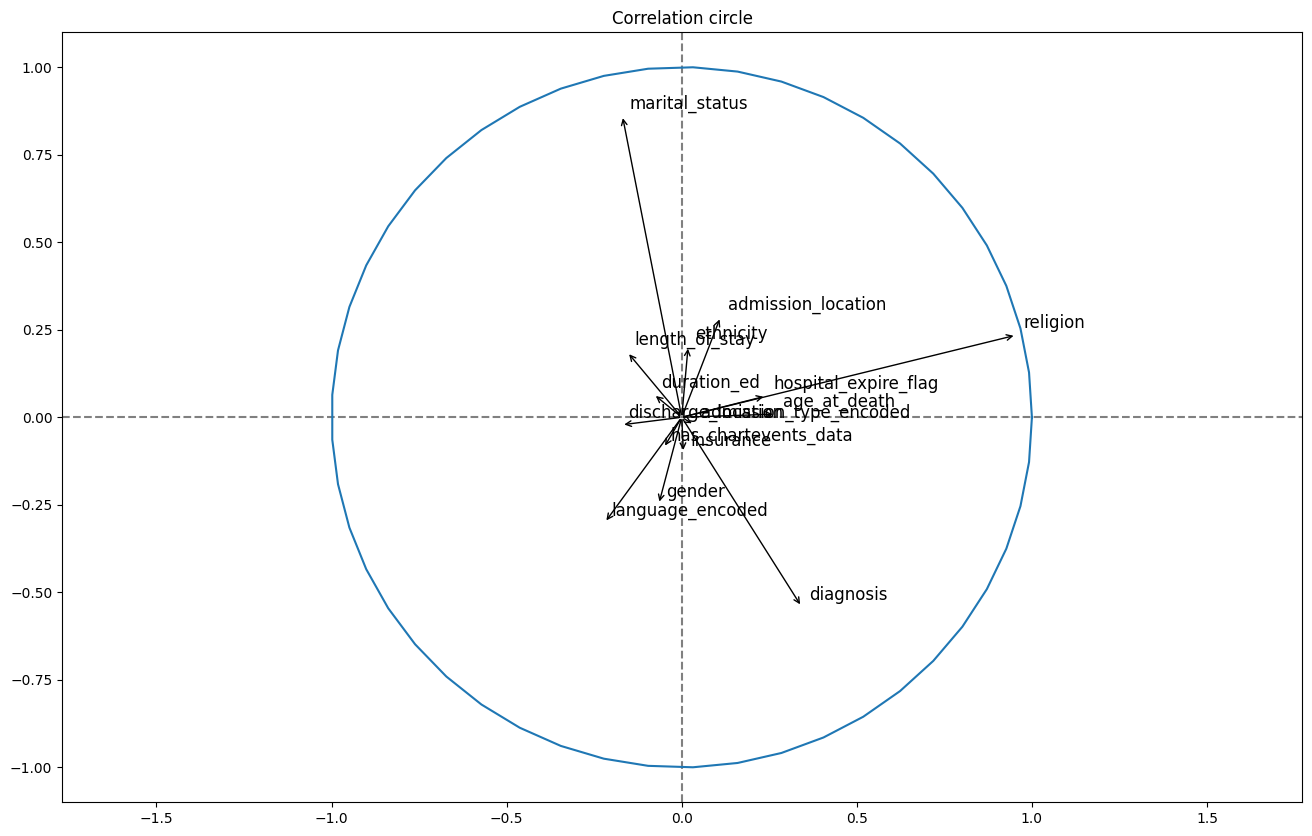

In [ ]:
import matplotlib.pyplot as plt

def plot_correlation_circle(pc1, pc2):
    fig, ax = plt.subplots(figsize=(16, 10))

    for i in range(scaled_df2.shape[1]):
        x = np.corrcoef(pc1,scaled_df2[scaled_df2.columns[i]])[0,1]
        y = np.corrcoef(pc2,scaled_df2[scaled_df2.columns[i]])[0,1]
        ax.annotate("", xy= (x,y), xytext=(0, 0),arrowprops=dict(arrowstyle="->"))
        ax.annotate(scaled_df2.columns[i], (x+0.02,y+0.02), size=12)


    ax.set_title('Correlation circle')
    ax.axhline(y=0, color="grey", linestyle="--")
    ax.axvline(x=0, color="grey", linestyle="--")

    an = np.linspace(0, 2 * np.pi)
    plt.plot(np.cos(an), np.sin(an))
    plt.axis('equal')
    plt.show()

plot_correlation_circle(pca_df.PC1,pca_df.PC2)


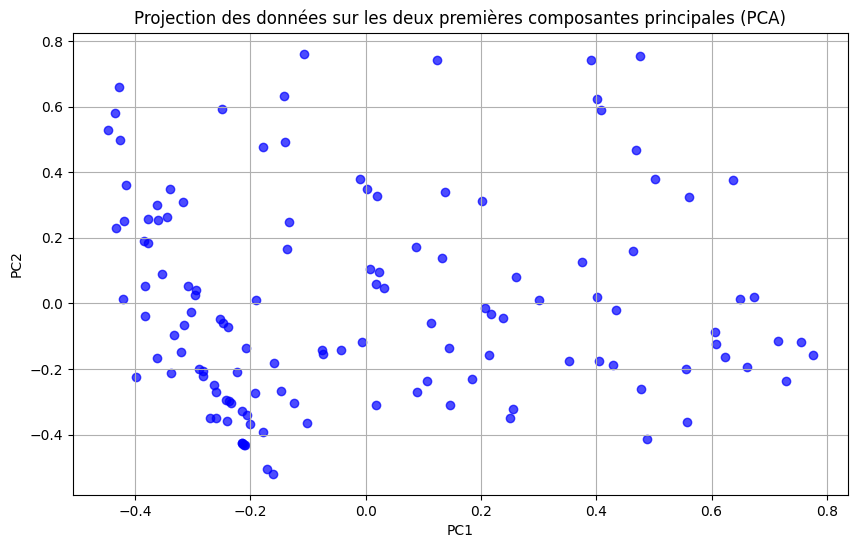

In [ ]:
import matplotlib.pyplot as plt

# Visualisation simple
plt.figure(figsize=(10, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], alpha=0.7, c='blue')
plt.title('Projection des données sur les deux premières composantes principales (PCA)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid(True)
plt.show()


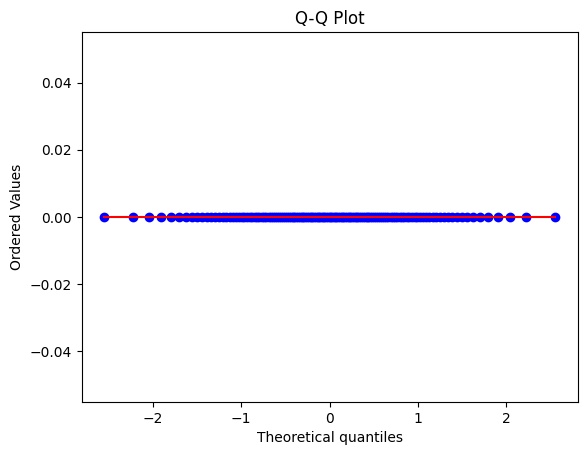

In [ ]:
import scipy.stats as stats
#voir si elle suit une distribution normale
# Q-Q plot pour une colonne
stats.probplot(scaled_df2['expire_flag'], dist="norm", plot=plt)
plt.title("Q-Q Plot")
plt.show()


K means sur toutes les donnes scaled_df2

In [ ]:
data31=scaled_df2.copy()
data31.shape


(129, 16)

In [ ]:
data31.head()

,admission_location,discharge_location,insurance,religion,marital_status,ethnicity,diagnosis,hospital_expire_flag,has_chartevents_data,gender,expire_flag,length_of_stay,age_at_death,duration_ed,admission_type_encoded,language_encoded
0,0.25,0.333333,0.333333,0.111111,0.4,0.250,0.776596,0.0,1.0,0.0,0.0,0.070993,0.183746,0.264134,0.0,0.0
1,0.75,0.000000,0.000000,0.111111,0.6,0.875,0.382979,1.0,1.0,0.0,0.0,0.111450,0.060071,0.234982,0.0,0.0
2,0.75,0.000000,0.333333,0.111111,0.2,0.875,0.776596,1.0,1.0,0.0,0.0,0.021078,0.240283,0.234982,0.0,0.0
3,0.25,1.000000,0.333333,0.111111,0.0,1.000,0.393617,0.0,1.0,0.0,0.0,0.064701,0.201413,0.334806,0.0,0.0
4,0.75,0.000000,0.333333,0.111111,0.0,1.000,0.085106,1.0,1.0,1.0,0.0,0.004830,0.102473,0.234982,0.0,0.0


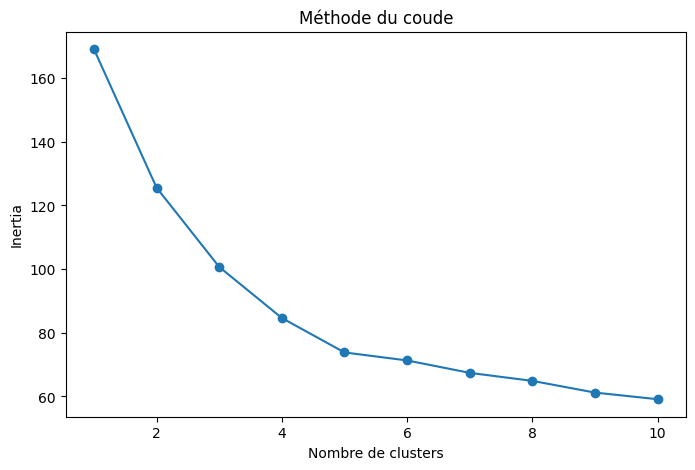

In [ ]:
from sklearn.cluster import KMeans
inertia = []
range_clusters = range(1, 11)  # Testez de 1 à 10 clusters

for k in range_clusters:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data31)
    inertia.append(kmeans.inertia_)

# Tracer le graphe du coude
plt.figure(figsize=(8, 5))
plt.plot(range_clusters, inertia, marker='o')
plt.title("Méthode du coude")
plt.xlabel("Nombre de clusters")
plt.ylabel("Inertia")
plt.show()


In [ ]:
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(data31)

# Labels des clusters
labels = kmeans.labels_
data31['Cluster'] = labels  # Ajouter les labels aux données initiales

print("Centres des clusters :")
print(kmeans.cluster_centers_)

print("\nLabels des clusters ajoutés :")
print(data31.head())


Centres des clusters :
[[ 2.89215686e-01  6.77559913e-01  2.61437908e-01  3.26797386e-01
   3.01960784e-01  8.01470588e-01  5.43178974e-01 -2.22044605e-16
   1.00000000e+00  1.00000000e+00  0.00000000e+00  8.10960960e-02
   2.02106284e-01  2.19912700e-01  2.94117647e-02  3.08823529e-01
  -9.99200722e-16]
 [ 3.62500000e-01  6.94444444e-01  2.66666667e-01  5.11111111e-01
   2.80000000e-01  7.93750000e-01  5.43085106e-01  5.55111512e-17
   1.00000000e+00  1.11022302e-16  0.00000000e+00  8.44142019e-02
   2.25618375e-01  2.90371025e-01  1.00000000e-01  7.50000000e-02
   2.00000000e+00]
 [ 4.02777778e-01  8.20987654e-01  3.14814815e-01  2.46913580e-01
   7.66666667e-01  9.65277778e-01  4.19030733e-01  5.55111512e-17
   1.00000000e+00  1.11022302e-16  0.00000000e+00  6.45143920e-02
   2.95838241e-01  2.37681586e-01  8.33333333e-02  4.16666667e-02
   2.00000000e+00]
 [ 3.92857143e-01  5.55111512e-17  2.85714286e-01  5.29100529e-01
   4.28571429e-01  8.92857143e-01  6.33232016e-01  1.00000000e

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


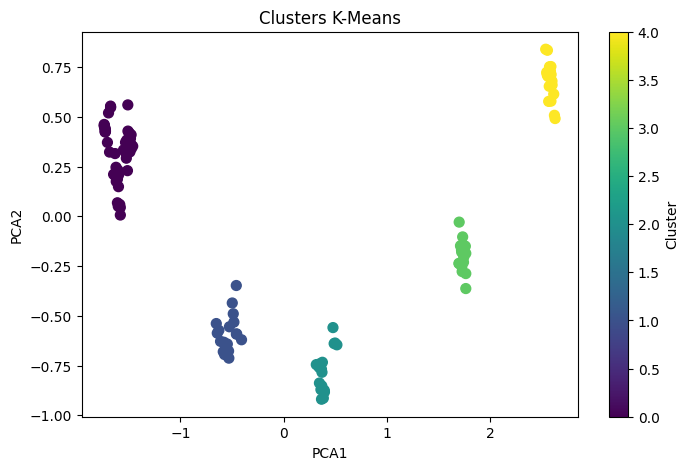

In [ ]:
from sklearn.decomposition import PCA

# Réduction à 2 dimensions avec PCA
pca = PCA(n_components=2)
data_pca_data31 = pca.fit_transform(data31)

plt.figure(figsize=(8, 5))
plt.scatter(data_pca_data31[:, 0], data_pca_data31[:, 1], c=labels, cmap='viridis', s=50)
plt.title("Clusters K-Means")
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.colorbar(label="Cluster")
plt.show()


In [ ]:
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(data_pca_data31, labels)
print(f"Score de silhouette : {silhouette_avg:.2f}")


Score de silhouette : 0.87


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Interpretation de k means

In [ ]:
cluster_summary = data31.groupby('Cluster').mean()
print(cluster_summary)


         admission_location  discharge_location  insurance  religion  \
Cluster                                                                
0                  0.289216            0.677560   0.261438  0.326797   
1                  0.362500            0.694444   0.266667  0.511111   
2                  0.402778            0.820988   0.314815  0.246914   
3                  0.392857            0.000000   0.285714  0.529101   
4                  0.394737            0.000000   0.385965  0.526316   

         marital_status  ethnicity  diagnosis  hospital_expire_flag  \
Cluster                                                               
0              0.301961   0.801471   0.543179                   0.0   
1              0.280000   0.793750   0.543085                   0.0   
2              0.766667   0.965278   0.419031                   0.0   
3              0.428571   0.892857   0.633232                   1.0   
4              0.336842   0.822368   0.429451                   1.0  

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Cluster 0 : Patients jeunes avec une durée de séjour plus courte

            Admis principalement depuis : admission_location (0.289).
            Discharge_location élevé : 0.677, indiquant des patients souvent transférés ou sortis à domicile.
            Assurance : Niveau moyen de 0.261.
            Religion et statut marital : Religion (0.326) et état marital (0.302) plutôt diversifiés.
            Ethnicité majoritaire : Relativement élevée (0.801).
            Diagnostic : Score moyen de 0.543.
            Expire_flag : Aucun décès signalé.
            Durée de séjour : Courte (0.081).
            Langue principale : Moyennement diversifiée (0.308).

Cluster 1 : Patients féminins avec diversité dans la religion et l’admission

            Genre féminin : 0.0 (féminin).
            Admis depuis divers lieux : Score élevé pour admission_location (0.362).
            Religion dominante : 0.511, signalant une influence notable de certaines confessions.
            Ethnicité : Légèrement plus basse que le cluster 0 (0.794).
            Expire_flag : Aucun décès.
            Durée de séjour moyenne : 0.084.
            Langue principale : Faible diversité (0.075).

Cluster 2 : Patients âgés avec des diagnostics complexes

            Ethnicité élevée : 0.965, signalant une population homogène.
            Statut marital : 0.767, montrant une majorité mariée.
            Diagnostic : Complexité relativement faible (0.419).
            Durée de séjour courte : 0.064.
            Âge au décès : Le plus élevé (0.296).
            Langue principale : Faible diversité (0.042).

Cluster 3 : Patients en fin de vie avec des durées de séjour longues

            Hospital_expire_flag : 1.0, tous les patients sont décédés à l'hôpital.
            Ethnicité : Très élevée (0.893).
            Statut marital et religion : Religion (0.529) et statut marital (0.429) plutôt diversifiés.
            Durée de séjour élevée : 0.088.
            Langue : Moyenne diversité (0.107).

Cluster 4 : Patients masculins avec des séjours très courts

            Genre masculin : 1.0 (masculin).
            Durée de séjour la plus courte : 0.044.
            Admitted_type : Score minimal (0.000), signalant des admissions d'urgence ou directes.
            Hospital_expire_flag : 1.0, décès probable pour plusieurs patients.
            Langue et diversité : Moins diversifiés (0.013).

avec hca

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import matplotlib.pyplot as plt


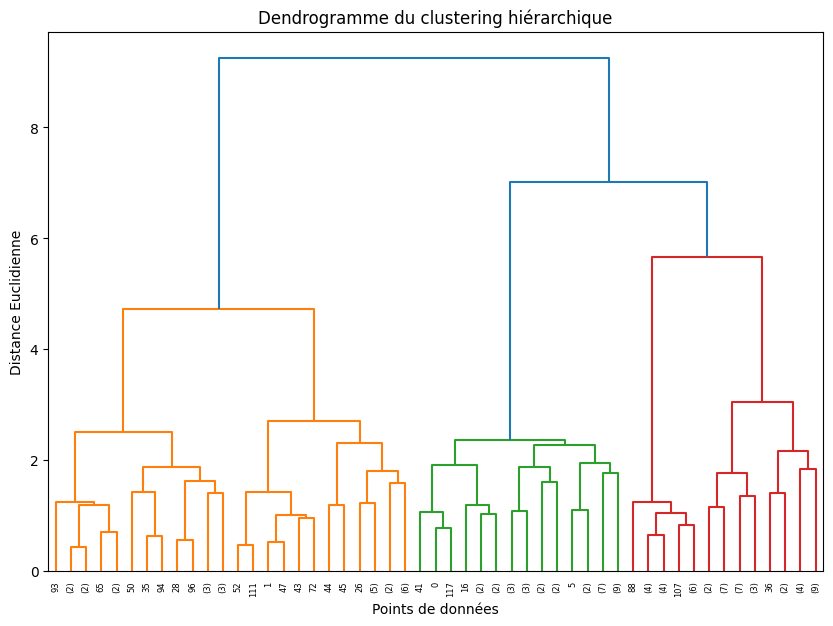

In [ ]:
data32=scaled_df2.copy()
# Appliquer le clustering hiérarchique
linked = linkage(data32, method='ward')  # Utilisation de la méthode de Ward

# Tracer le dendrogramme
plt.figure(figsize=(10, 7))
dendrogram(linked, truncate_mode='level', p=5)  # Truncation pour lisibilité (p = 5)
plt.title("Dendrogramme du clustering hiérarchique")
plt.xlabel("Points de données")
plt.ylabel("Distance Euclidienne")
plt.show()


In [ ]:
# Découper en un nombre fixe de clusters (par exemple, k=3)
n_clusters = 3
cluster_labels = fcluster(linked, n_clusters, criterion='maxclust')

# Ajouter les labels aux données
data32['Cluster'] = cluster_labels

print("Labels des clusters ajoutés :")
print(data32.head())


Labels des clusters ajoutés :
   admission_location  discharge_location  insurance  religion  \
0                0.25            0.333333   0.333333  0.111111   
1                0.75            0.000000   0.000000  0.111111   
2                0.75            0.000000   0.333333  0.111111   
3                0.25            1.000000   0.333333  0.111111   
4                0.75            0.000000   0.333333  0.111111   

   marital_status  ethnicity  diagnosis  hospital_expire_flag  \
0             0.4      0.250   0.776596                   0.0   
1             0.6      0.875   0.382979                   1.0   
2             0.2      0.875   0.776596                   1.0   
3             0.0      1.000   0.393617                   0.0   
4             0.0      1.000   0.085106                   1.0   

   has_chartevents_data  gender  expire_flag  length_of_stay  age_at_death  \
0                   1.0     0.0          0.0        0.070993      0.183746   
1                   1.0   

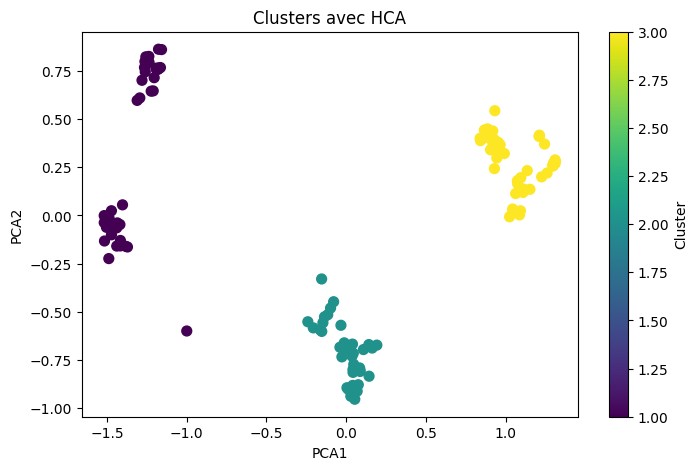

In [ ]:
from sklearn.decomposition import PCA

# Réduction à 2 dimensions avec PCA
pca = PCA(n_components=2)
data_pca32 = pca.fit_transform(data32)

# Tracer les clusters
plt.figure(figsize=(8, 5))
plt.scatter(data_pca32[:,0], data_pca32[:,1], c=cluster_labels, cmap='viridis', s=50)
plt.title("Clusters avec HCA")
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.colorbar(label="Cluster")
plt.show()


In [ ]:
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(data32, cluster_labels)
print(f"Score de silhouette : {silhouette_avg:.2f}")


Score de silhouette : 0.37


Avec dbscan

In [ ]:
import pandas as pd
from sklearn.cluster import DBSCAN

data33=scaled_data2.copy()
# Convert the NumPy array to a Pandas DataFrame
data33 = pd.DataFrame(data33)

# Appliquer DBSCAN
dbscan = DBSCAN(eps=1, min_samples=20)  # Ajustez eps et min_samples si nécessaire
dbscan.fit(data33)

# Labels des clusters
labels = dbscan.labels_
# Now, you can add a new column with the cluster labels
data33['Cluster'] = labels

# Affichage des clusters
print("Labels des clusters :", np.unique(labels))
print("Nombre de points dans chaque cluster :")
print(pd.Series(labels).value_counts())

Labels des clusters : [-1  0  1]
Nombre de points dans chaque cluster :
-1    51
 0    46
 1    32
Name: count, dtype: int64


In [ ]:
# Compter le nombre de clusters (excluant le bruit)
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = list(labels).count(-1)

print(f"Nombre de clusters : {n_clusters}")
print(f"Nombre de points considérés comme bruit : {n_noise}")

# Évaluer avec le score de silhouette si au moins 2 clusters existent
if n_clusters > 1:
    silhouette_avg = silhouette_score(data33, labels)
    print(f"Score de silhouette : {silhouette_avg:.2f}")
else:
    print("Pas assez de clusters pour calculer le score de silhouette.")


Nombre de clusters : 2
Nombre de points considérés comme bruit : 51
Score de silhouette : 0.34


avec gmm

In [ ]:
from sklearn.mixture import GaussianMixture
datagmm=scaled_df2.copy()
gmm = GaussianMixture(n_components=3)
gmm.fit(datagmm)

GaussianMixture(n_components=3)

In [ ]:
# Prédictions avec GMM
labels = gmm.predict(datagmm)

# Créer un DataFrame à partir de data_normalized3
frame = pd.DataFrame(datagmm)

# Ajouter la colonne 'label' pour stocker les labels des clusters
frame['label'] = labels

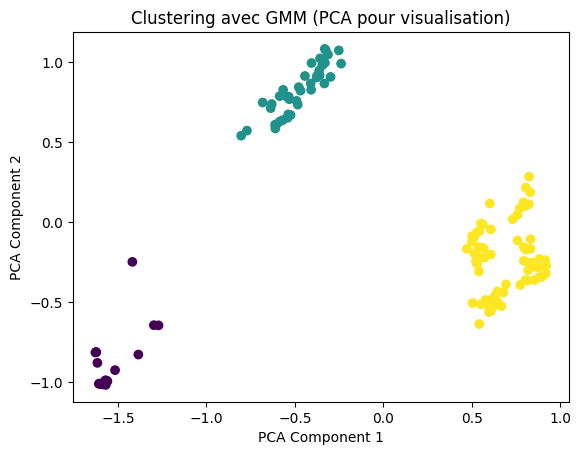

In [ ]:
from sklearn.decomposition import PCA

# Réduction de la dimensionnalité à 2 dimensions pour la visualisation
pca = PCA(n_components=2)
data_2d_2 = pca.fit_transform(frame)

# Visualiser les clusters en 2D
plt.scatter(data_2d_2[:, 0], data_2d_2[:, 1], c=frame['label'], cmap='viridis')
plt.title('Clustering avec GMM (PCA pour visualisation)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()


In [ ]:
# Calculez le score de silhouette
silhouette_avg = silhouette_score(frame, frame['label'])
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.4092777422795541


In [ ]:
pca_df.shape

(129, 6)

Association rules


In [ ]:
!pip install mlxtend

In [ ]:
data_for_association_rule1=data_for_association_rule.drop(columns=['subject_id','hadm_id'])
data_for_association_rule2 = data_for_association_rule1[['admission_type', 'admission_location', 'discharge_location', 'insurance', 'diagnosis']].head(10)
data_for_association_rule2

,admission_type,admission_location,discharge_location,insurance,diagnosis
0,EMERGENCY,EMERGENCY ROOM ADMIT,HOME HEALTH CARE,Medicare,SEPSIS
1,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,DEAD/EXPIRED,Private,HEPATITIS B
2,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,DEAD/EXPIRED,Medicare,SEPSIS
3,EMERGENCY,EMERGENCY ROOM ADMIT,SNF,Medicare,HUMERAL FRACTURE
4,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,DEAD/EXPIRED,Medicare,ALCOHOLIC HEPATITIS
5,EMERGENCY,EMERGENCY ROOM ADMIT,REHAB/DISTINCT PART HOSP,Medicare,STROKE/TIA
6,ELECTIVE,PHYS REFERRAL/NORMAL DELI,SNF,Medicare,MITRAL REGURGITATION;CORONARY ARTERY DISEASE\...
7,EMERGENCY,EMERGENCY ROOM ADMIT,SNF,Medicare,SYNCOPE;TELEMETRY
8,EMERGENCY,EMERGENCY ROOM ADMIT,REHAB/DISTINCT PART HOSP,Medicare,RIGHT HUMEROUS FRACTURE
9,EMERGENCY,EMERGENCY ROOM ADMIT,SNF,Medicare,RENAL FAILIURE-SYNCOPE-HYPERKALEMIA


In [ ]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

# Exemple de votre dataset
data = {
    'admission_type': ['EMERGENCY', 'EMERGENCY', 'EMERGENCY', 'EMERGENCY', 'EMERGENCY', 'EMERGENCY', 'ELECTIVE', 'EMERGENCY', 'EMERGENCY', 'EMERGENCY'],
    'admission_location': ['EMERGENCY ROOM ADMIT', 'TRANSFER FROM HOSP/EXTRAM', 'TRANSFER FROM HOSP/EXTRAM', 'EMERGENCY ROOM ADMIT', 'TRANSFER FROM HOSP/EXTRAM', 'EMERGENCY ROOM ADMIT', 'PHYS REFERRAL/NORMAL DELI', 'EMERGENCY ROOM ADMIT', 'EMERGENCY ROOM ADMIT', 'EMERGENCY ROOM ADMIT'],
    'discharge_location': ['HOME HEALTH CARE', 'DEAD/EXPIRED', 'DEAD/EXPIRED', 'SNF', 'DEAD/EXPIRED', 'REHAB/DISTINCT PART HOSP', 'SNF', 'SNF', 'REHAB/DISTINCT PART HOSP', 'SNF'],
    'insurance': ['Medicare', 'Private', 'Medicare', 'Medicare', 'Medicare', 'Medicare', 'Medicare', 'Medicare', 'Medicare', 'Medicare'],
    'diagnosis': ['SEPSIS', 'HEPATITIS B', 'SEPSIS', 'HUMERAL FRACTURE', 'ALCOHOLIC HEPATITIS', 'STROKE/TIA', 'MITRAL REGURGITATION', 'SYNCOPE', 'RIGHT HUMEROUS FRACTURE', 'RENAL FAILIURE']
}

# Convertir en DataFrame
df = pd.DataFrame(data)

# Étape 1: Préparer les transactions (chaque ligne devient une liste d'éléments)
transactions = df.apply(lambda row: row.dropna().tolist(), axis=1).tolist()

# Étape 2: Appliquer TransactionEncoder pour effectuer l'encodage one-hot
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)

# Créer un DataFrame avec les données encodées
encoded_df = pd.DataFrame(te_ary, columns=te.columns_)


encoded_df

,ALCOHOLIC HEPATITIS,DEAD/EXPIRED,ELECTIVE,EMERGENCY,EMERGENCY ROOM ADMIT,HEPATITIS B,HOME HEALTH CARE,HUMERAL FRACTURE,MITRAL REGURGITATION,Medicare,PHYS REFERRAL/NORMAL DELI,Private,REHAB/DISTINCT PART HOSP,RENAL FAILIURE,RIGHT HUMEROUS FRACTURE,SEPSIS,SNF,STROKE/TIA,SYNCOPE,TRANSFER FROM HOSP/EXTRAM
0,False,False,False,True,True,False,True,False,False,True,False,False,False,False,False,True,False,False,False,False
1,False,True,False,True,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,True
2,False,True,False,True,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,True
3,False,False,False,True,True,False,False,True,False,True,False,False,False,False,False,False,True,False,False,False
4,True,True,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True
5,False,False,False,True,True,False,False,False,False,True,False,False,True,False,False,False,False,True,False,False
6,False,False,True,False,False,False,False,False,True,True,True,False,False,False,False,False,True,False,False,False
7,False,False,False,True,True,False,False,False,False,True,False,False,False,False,False,False,True,False,True,False
8,False,False,False,True,True,False,False,False,False,True,False,False,True,False,True,False,False,False,False,False
9,False,False,False,True,True,False,False,False,False,True,False,False,False,True,False,False,True,False,False,False


In [ ]:
from mlxtend.frequent_patterns import apriori, association_rules

# Define the minimum support threshold (e.g., 0.4 means an itemset must appear in at least 40% of transactions)
min_support = 0.3

# Perform frequent itemset mining using Apriori
frequent_itemsets = apriori(encoded_df, min_support=min_support, use_colnames=True)

print("Frequent Itemsets:")
print(frequent_itemsets)

Frequent Itemsets:
    support                                           itemsets
0       0.3                                     (DEAD/EXPIRED)
1       0.9                                        (EMERGENCY)
2       0.6                             (EMERGENCY ROOM ADMIT)
3       0.9                                         (Medicare)
4       0.4                                              (SNF)
5       0.3                        (TRANSFER FROM HOSP/EXTRAM)
6       0.3                          (DEAD/EXPIRED, EMERGENCY)
7       0.3          (DEAD/EXPIRED, TRANSFER FROM HOSP/EXTRAM)
8       0.6                  (EMERGENCY ROOM ADMIT, EMERGENCY)
9       0.8                              (Medicare, EMERGENCY)
10      0.3                                   (SNF, EMERGENCY)
11      0.3             (TRANSFER FROM HOSP/EXTRAM, EMERGENCY)
12      0.6                   (Medicare, EMERGENCY ROOM ADMIT)
13      0.3                        (SNF, EMERGENCY ROOM ADMIT)
14      0.4                         

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Generate association rules with minimum confidence threshold (e.g., 0.6)
min_confidence = 0.6
total_itemsets =len(frequent_itemsets)
association_rules_df = association_rules(frequent_itemsets, metric="confidence", min_threshold=min_confidence,num_itemsets=total_itemsets)

print("\nAssociation Rules:")
print(association_rules_df[['antecedents', 'consequents', 'support', 'confidence','lift']])



Association Rules:
                                  antecedents  \
0                              (DEAD/EXPIRED)   
1                              (DEAD/EXPIRED)   
2                 (TRANSFER FROM HOSP/EXTRAM)   
3                      (EMERGENCY ROOM ADMIT)   
4                                 (EMERGENCY)   
5                                  (Medicare)   
6                                 (EMERGENCY)   
7                                       (SNF)   
8                 (TRANSFER FROM HOSP/EXTRAM)   
9                                  (Medicare)   
10                     (EMERGENCY ROOM ADMIT)   
11                                      (SNF)   
12                                      (SNF)   
13  (DEAD/EXPIRED, TRANSFER FROM HOSP/EXTRAM)   
14                  (DEAD/EXPIRED, EMERGENCY)   
15     (TRANSFER FROM HOSP/EXTRAM, EMERGENCY)   
16                             (DEAD/EXPIRED)   
17                (TRANSFER FROM HOSP/EXTRAM)   
18           (Medicare, EMERGENCY ROOM ADMIT)   


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
